# logistic regression 

* Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

* Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

* In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

* The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.

* Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.

* Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification.

# the general equation for logistic regression is 

### Ax  + Bx + C = 0 
 
 
### IF YOU WANT TO SEE HOW CHANGE IN  EITHER A OR B OR C WILL AFFECT THE LINE :

CHECK OUT THE LINK  : 

#### https://www.desmos.com/calculator/mwzod7hhyu

 Logistic regression is primarily used for classification tasks, not regression tasks, despite its name. It is a statistical model used to predict the probability of a binary or categorical outcome based on input features. It is one of the fundamental techniques for binary classification.

In logistic regression, the dependent variable is a binary variable (0 or 1) that represents the two possible classes or categories. The goal is to find the relationship between the input features (independent variables) and the probability of belonging to a particular class.

The logistic regression model uses the logistic function (also called the sigmoid function) to map the linear combination of input features to a value between 0 and 1. The output of the logistic function represents the predicted probability of the sample belonging to the positive class. A threshold (typically 0.5) is used to classify the samples into the respective classes.

Although the term "regression" is used in the name, logistic regression is a classification algorithm rather than a regression algorithm. If you have a regression task (predicting a continuous numerical value), other regression techniques such as linear regression or polynomial regression would be more appropriate.

In [10]:
## tables of contens :

# logistic regression
# the general euquation for logistic regression
# the simpler and expand formula for the desicion boundary
# logistic regression perceptron trick


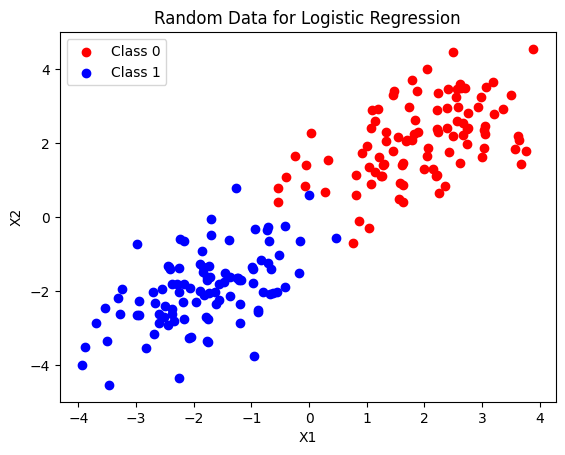

In [10]:
## let me show you first how do we do this on logitic regression

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples for each class
num_samples = 100

# Generate random data for class 0
x0 = np.random.multivariate_normal([2, 2], [[1, .5], [.5, 1]], num_samples)
y0 = np.zeros(num_samples)

# Generate random data for class 1
x1 = np.random.multivariate_normal([-2, -2], [[1, .5], [.5, 1]], num_samples)
y1 = np.ones(num_samples)

# Concatenate the data and labels
X = np.vstack((x0, x1))
y = np.concatenate((y0, y1))

# Plot the generated data
plt.scatter(x0[:, 0], x0[:, 1], c='r', label='Class 0')
plt.scatter(x1[:, 0], x1[:, 1], c='b', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Random Data for Logistic Regression')
plt.legend()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.2 , random_state =25)

In [14]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(X_train , y_train)

LogisticRegression()

In [16]:
y_pred = model1.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


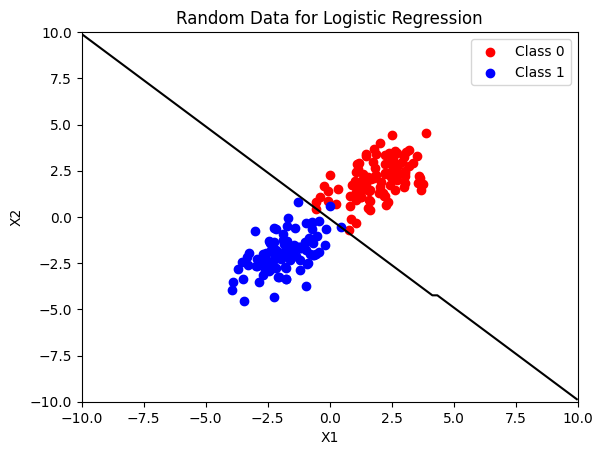

In [28]:
# Plot the generated data
plt.scatter(x0[:, 0], x0[:, 1], c='r', label='Class 0')
plt.scatter(x1[:, 0], x1[:, 1], c='b', label='Class 1')

# Create a meshgrid of points across the feature space
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X_mesh, Y_mesh = np.meshgrid(x_vals, y_vals)
points = np.c_[X_mesh.ravel(), Y_mesh.ravel()]

# Make predictions on the meshgrid points using the trained model
Z = model1.predict(points)
Z = Z.reshape(X_mesh.shape)

# Plot the decision boundary
plt.contour(X_mesh, Y_mesh, Z, levels=[0.5], colors='black')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Random Data for Logistic Regression')
plt.legend()
plt.show()

### instead of writing the equation like this 

### Ax  + Bx + C = 0 

### we write it like this 


## The formula for the desicion boundary in logistic regression

### w 0  + w1 x 1 + w2 x2 = 0 

where : 
* w0 =c 
* w1 = a 
* w2 = b
* the x are the features

but we can simplif it more :

we add  1 before the first feautre or column in X_train and then the equation will be like :

### w 0 x 0 + w 1 x1 + w2 x 2 = 0  

where we add a bias as 1 

this is basically this 

### sigma of i to ncolumns or nfeatures * wi x i = 0 


Instead of:
w1x1 + w2x2 = 0

It becomes:
w0 + w1x1 + w2x2 = 0

In this case, the bias term w0 is added as a separate feature with a constant value of 1, and the corresponding weight w0 is multiplied by 1.

To represent this in a more general form, where xi represents the ith feature and wi represents the corresponding weight, the logistic regression equation becomes:

w0x0 + w1x1 + w2x2 + ... + wnxn = 0

Here, x0 is the bias term, which is always set to 1, and w0 is the weight associated with the bias term.

The sigma symbol you mentioned (∑) is used to represent the summation of the products of weights and features across all features. So, the logistic regression equation can be written using sigma notation as:

∑(wi*xi) = 0

This equation represents the linear combination of the features multiplied by their corresponding weights, summed together, and equal to zero.

Please note that the specific notation and convention may vary depending on the context or textbook. It's important to refer to the specific notation or equation format used in the material you are studying or following.

## logistic regression perceptron trick 

In [2]:
from sklearn.datasets import make_classification
import numpy as np
x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [3]:
x[0]

array([ 0.19924745, -0.11697552])

In [4]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

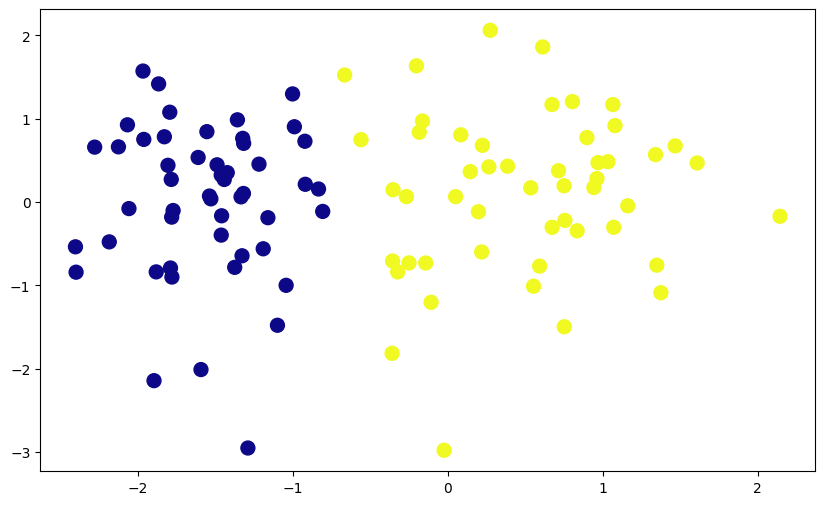

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma',s=100)

# the target columns or y is 1 or 0  here yellow is 1 and blue is zero

In [56]:
def perceptron(x,y):
     # first we add 1 at the 0 index for the bias 
    X = np.insert(x,0,1,axis=1)
    
    # now we add weights array  with the same size or shape as X 
    # it will look something like this ([1 , 1 , 1]) where the first 1 is the bias
    # the second is the slope and the last is the y_intercept
    weights = np.ones(X.shape[1])
    # initialise learning rate
    lr = 0.1
    
     # now we runt the epochs 1000 times
    for i in range(1000):
         # we then select a random numbers between zero and hundred as the shape of our X is 100 , 2
        j = np.random.randint(0,100)
         #  then we find the y_hat or the predicted step basically return 1 if z > 0 else 0
        y_hat = step(np.dot(X[j],weights))
        
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [10]:
# this is an example fo what will happen the 't' represents the 'x' here and 41 here is  j and 1 , 1  , 1  are the weights
np.dot(t[41] ,[1, 1 , 1 ])

0.2946000908036749

In [13]:
# this if for the weights which is the above code where we plus weigths
# with learning_rate * y [j] - y_hat) * x[j] 
[1 , 1 , 1] + 0.1 * (y[43] - 0.294600090803674 ) * t[41]

array([1.07053999, 0.93525607, 1.01498502])

In [57]:
def step(z):
    return 1 if z > 0 else 0 

In [58]:
intercept_ , coef_ = perceptron(x , y)

In [59]:
print(coef_)
print(intercept_)

[1.29206995 0.13726826]
1.0


In [60]:
# lets plot it but first we need to find m and b 
# now we have Ax + bx +v = 0 
# we can bring it down to y = mx + b

# m = -a[0] / b[1] 
# c = -c(intercept) / b[1]

m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [61]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b


(-3.0, 2.0)

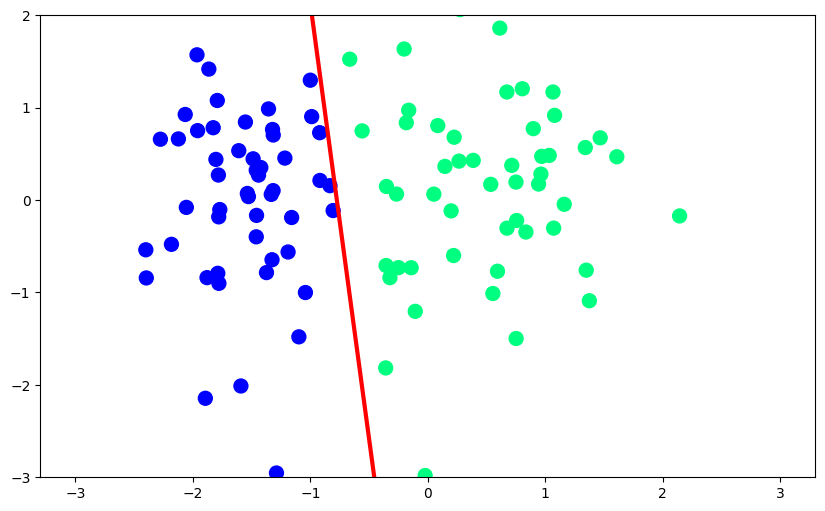

In [62]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# decision boundary animation 

###  you can check the animation on the file app.py
